IPython Notebook Demo
===================

Outline
-------

* Illustrate tunneling in
* cells - code + docs
  * modify and re-run
* command-line shell invocation
  * run commands
  * capture output
  * e.g. capture groupquota -a
* plotting - use a matplotlib demo
  * one of the GIS demos
  * show modify and re-run plotting
* show off notebook on github
* show nbviewer displaying from public github
* show configuring IPython profile to submit PBS jobs with qsub

Tunneling
---------

For running on itasca just chain (ideally with SSH key access)

`ssh -L 12123:localhost:12123 (login.msi.umn.edu|itasca)
module load python-epd
ipython notebook --no-browser --port=12123`

This works as many levels deep as we like -- can run on head-node for testing, run on compute node for processing

IPython shell and cells
--------------

Code and documentation live in **cells**

Code executed in cells captures results. All code executed in a notebook runs in the same python session.

In [6]:
range(20)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
_6[4] * 20

80

Abundance of magic commands automate common tasks.

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %install_default_config  %install_ext  %install_profiles  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%latex  %%perl  %%pr

In [10]:
!ls

ipython.o1173016  Monitoring an MPI Simulation - 1.ipynb  pbs_engines
ipython.o1173018  MSI Examples.ipynb			  README.md


In [12]:
import numpy as np

In [8]:
(np.random.randn(10000)**2).sum()

9738.9450546092739

In [13]:
%%timeit
a = np.random.randn(10**6)**2
a.sum()

10 loops, best of 3: 61.6 ms per loop


Command-line shell tools
---------------

In [13]:
!git status

# On branch master
# Changed but not updated:
#   (use "git add <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   MSI Examples.ipynb
#
# Untracked files:
#   (use "git add <file>..." to include in what will be committed)
#
#	.ipynb_checkpoints/
no changes added to commit (use "git add" and/or "git commit -a")


In [14]:
quotas = !groupquota -a
quotas

['USERNAME | ACTIVE | SECONDARY USER | GBYTES  | FILES     | %BYTES  | %FILES  | GALAXY GBYTES',
 '--------------------------------------------------------------------------------------------',
 'kats     | false  | false          | 1301.52 | 132,838   | 16.8 %  | 3.1 %   | 55.91        ',
 'jballer  | true   | false          | 1136.98 | 16,763    | 14.7 %  | 0.4 %   | 1.05         ',
 'mknox    | true   | false          | 1011.64 | 261,991   | 13.1 %  | 6.1 %   | --           ',
 'yzhang   | true   | false          | 835.42  | 156,516   | 10.8 %  | 3.7 %   | 0.00         ',
 'chityala | false  | false          | 715.76  | 1,055,539 | 9.3 %   | 24.7 %  | 0.00         ',
 'jgarbe   | true   | true           | 601.03  | 3,877     | 7.8 %   | 0.1 %   | --           ',
 'jj       | true   | false          | 427.84  | 969,628   | 5.5 %   | 22.7 %  | 4218.67      ',
 'jerdmann | false  | false          | 382.14  | 2,861     | 4.9 %   | 0.1 %   | 131.03       ',
 'tnguyen  | true   | false   

In [16]:
%%latex
Yes Evan, you can use MathJax!
\begin{aligned}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{aligned}

Plotting
--------



In [14]:
%matplotlib inline

Now we are set to capture the output of plotting actions in the notebook. By default the plot data is stored along with the notebook, but we can always re-run the cells to refresh the plot.

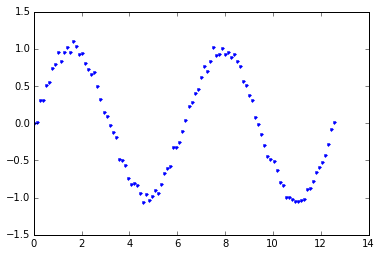

In [17]:
import matplotlib.pyplot as plt
x = np.linspace(0,4*np.pi,100)
y = np.sin(x) + np.random.randn(100)/20
plt.plot(x,y,'.')

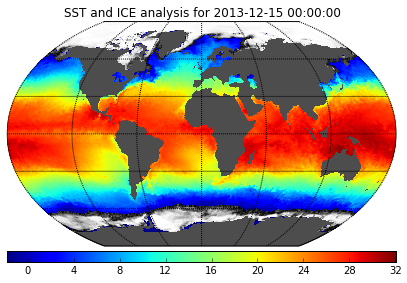

In [19]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
date = datetime(2013,12,15,0) # date to plot.
# open dataset.
dataset = Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(projection='kav7',lon_0=0,resolution=None)
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,99.,30.))
m.drawmeridians(np.arange(-180.,180.,60.))
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

We can also use external graphics -- handy if we want to work with images that another program is generating.

In [27]:
from IPython.display import Image
Image(url='https://www.msi.umn.edu/sites/all/themes/umn/assets/img/logo_uofm_D2D.gif')

Version control and public display
-----------

Notebooks use a text representation, amenable to version control.

Check this one out in Github: https://github.umn.edu/milligan/msi-ipython-nb-ex

If you put the notebook somewhere world-readable, the notebook viewer web interface allows read-only publication:
http://nbviewer.ipython.org/github/mbmilligan/msi-ipython-nb-ex/blob/master/MSI%20Examples.ipynb

Parallel engines
---------------

See IPython dashboard tab for available notebooks, cluster profiles, etc

We set up an "itasca" profile with a PBS script template. This requires a few steps, but only has to be done once.

`ipython profile create --parallel itasca`

This creates a new profile directory in `~/.ipython/profile_itasca`

In that directory there are configuration files for the cluster infrastructure. In `ipcluster_config.py` I set:

In this configuration, the cluster controller will run alongside my notebook server on the head node, but the engines will be started using PBS and mpiexec. 

In `ipcontroller_config.py` I set:

This tells the controller to listen on all interfaces, which should be safe since the headnode doesn't accept outside connections. If we wanted to be safer we could probably set this up such that it only listens for communications from nodes that are part of itasca. Even then, remember that there isn't any user authentication on this socket; in principle another user on itasca could listen in.

With that done, we can use the dashboard's Clusters tab to start the newly defined itasca engines.

In [21]:
!qstat -u milligan


node1081.localdomain: 
                                                                                  Req'd    Req'd       Elap
Job ID                  Username    Queue    Jobname          SessID  NDS   TSK   Memory   Time    S   Time
----------------------- ----------- -------- ---------------- ------ ----- ------ ------ --------- - ---------
1173018.node1081.local  milligan    batch    ipython           14562     4     32    --   01:00:00 R  00:43:14


In [19]:
from IPython import parallel
clients = parallel.Client(profile="itasca") # lust leave out the profile argument to get the default
print clients.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [20]:
%%px
import numpy as np
a = np.random.randn(2,2)
np.linalg.eigvals(a)

Out[0:2]: array([-1.23828183,  0.32602899])

Out[1:2]: array([ 1.85896049, -1.2927187 ])

Out[2:2]: array([-0.42273752,  1.12569741])

Out[3:2]: array([-2.81817145,  0.15612035])

Out[4:2]: array([ 0.38912442+0.94707862j,  0.38912442-0.94707862j])

Out[5:2]: array([ 1.73999805, -0.03042708])

Out[6:2]: array([-0.07490146+0.84744246j, -0.07490146-0.84744246j])

Out[7:2]: array([-0.98787937+0.3949985j, -0.98787937-0.3949985j])

Out[8:2]: array([ 1.52444805,  0.14473499])

Out[9:2]: array([-0.91832427+0.71093083j, -0.91832427-0.71093083j])

Out[10:2]: array([-1.73197107,  0.0532603 ])

Out[11:2]: array([-0.63234298,  0.35662109])

Out[12:2]: array([-0.65087267,  0.11887212])

Out[13:2]: array([-1.81464555,  0.65319432])

Out[14:2]: array([ 1.33543795,  0.08128808])

Out[15:2]: array([-0.54138563+0.18162899j, -0.54138563-0.18162899j])

Out[16:2]: array([-1.65893867, -0.77771344])

Out[17:2]: array([-1.19855262, -0.38562693])

Out[18:2]: array([-0.47556664+0.77769789j, -0.47556664-0.77769789j])

Out[19:2]: array([-0.3321334+0.43182318j, -0.3321334-0.43182318j])

Out[20:2]: array([-0.13097169+1.28209681j, -0.13097169-1.28209681j])

Out[21:2]: array([-0.11605382,  2.32543048])

Out[22:2]: array([-1.42649208,  0.04683155])

Out[23:2]: array([ 1.95564604, -0.32200787])

Out[24:2]: array([-0.55882193,  1.38235113])

Out[25:2]: array([ 0.50955738, -0.45085802])

Out[26:2]: array([ 0.06388522, -2.38035709])

Out[27:2]: array([-1.21319699, -0.01249812])

Out[28:2]: array([-0.34481051+0.69278978j, -0.34481051-0.69278978j])

Out[29:2]: array([-1.03354389, -0.33060661])

Out[30:2]: array([ 1.16148094, -1.0178418 ])

Out[31:2]: array([-0.23608131+0.75300971j, -0.23608131-0.75300971j])

In [23]:
!ps xw

  PID TTY      STAT   TIME COMMAND
 3100 pts/2    Rs+    0:00 ps xw
 9887 ?        S      0:00 sshd: milligan@pts/66
 9888 pts/66   Ss     0:00 -bash
10583 pts/66   Sl     0:31 /soft/python-epd/canopy-1.4.1/bin/python /soft/python-epd/canopy-1.4.1/bin/ipython notebook --no-browser
10615 pts/66   Sl     0:07 /soft/python-epd/canopy-1.4.1/bin/python -c from IPython.kernel.zmq.kernelapp import main; main() -f /pan
13145 pts/66   Sl     0:00 /soft/python-epd/canopy-1.4.1/bin/python -c from IPython.kernel.zmq.kernelapp import main; main() -f /pan
16108 ?        Ss     0:00 SCREEN
16109 pts/40   Ss+    0:00 /bin/bash
20800 pts/66   S+     0:00 vim ipcluster_config.py
